In [11]:
#Import libraries
import numpy as np
from PIL import Image
from numpy import loadtxt
from keras.models import load_model
import matplotlib.pyplot as plt

#Load the model
model = load_model('../code/model.h5')

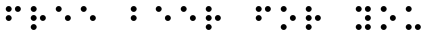

In [12]:
image_original = Image.open("img/guess.png").convert("L") #Greyscale
image_original

In [10]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

arr = np.array(image_original)
arr =  np.where(arr<100,0,255) 

values = arr.prod(axis=0)
values = np.where(values!=0,255,0)


### ------- CALCULATE COLMN THICKNESS: by calculating where the same line starts and ends ------

start = []
end = []
thick_col = []
previous = values[0]

for i,val in enumerate(values):
    if val == 0 and previous!=0: # This indicates when a vert line starts
        start.append(i)
    elif val !=0 and previous == 0: #This indicated when a vert line finnishes
        end.append(i)
        thick_col.append(i-start[-1]) #By substracting these values we get the thickness of the column
    previous = val
    
    
dist = [s-e for e,s in zip(start,start[1:])] #Distance between starting lines
dist_mean = sum(dist)/len(dist) #Mean distance between lines

thick_col = sum(thick_col)/len(thick_col) 


### -------- WHERE DOES A CHARACTER START: if distance between start of col1 and col2 is < than meandist is same character

letter_start = []
letter_end = []

for left, right in zip(start,start[1:]):
    if right - left < dist_mean:
        letter_start.append(left)
        letter_end.append(right) #segunda col mismo caracter

for i in start:
    if not((i in letter_start) or (i in letter_end)):
        letter_start.append(i)
        
letter_start = sorted(letter_start)

### -------- DIVIDING INTO LETTERS -----------

sep_letters = []
arr = np.array(image_original) #le paso la imagen original porque mi modelo NO esta entrenado con 0 o 1, sino gray
for st in letter_start:
    left = int(st-thick_col/2)
    left = left if left >= 0 else 0
    right = int(st+dist_mean+thick_col)
    right = right if right <= arr.shape[1] else arr.shape[1]
    sep_letters.append(arr[:,left:right])
    
### ------- PREPARING THE LETTERS FOR THE MODEL --------

prep_letters = []

for letter in sep_letters:
    img = Image.fromarray(letter.astype(np.uint8))
    img = img.resize((28,28))
    prep_letters.append(np.array(img).reshape(1,28,28,1)/255)
    
prep_letters = np.concatenate(prep_letters, axis = 0)

### -------- PREDICT WORD ------------

y_pred_word = np.argmax(model.predict(prep_letters),axis=1)
y_pred_word = [class_names[i] for i in y_pred_word]
prediction = ''.join(y_pred_word)
print(prediction)


FREEBEERFORYOU
